# Planar Systems

Let $$\frac{dX}{dt} = AX$$ be a linear $2\times 2$ system where $A\neq \mathbf{0}$. 
1. If $\det(A)\neq 0$, then $(x,y)=(0,0)$ is the unique equilibrium solution for the system.
2. If $\det(A)\neq 0$, then the equilibrium solutions for the system form a straight line in $\mathbb{R}^2$

**Theorem.** Let $\mathbf{v_0}$ be an eigenvector for the matrix $A$ with associated eigenvalue $\lambda$. Then the function $X(t)=e^{\lambda t}\mathbf{v_0}$ is a solution of the sysyem $X'=AX$

**Example.** Consider the following system:
$$
x' = x+3y\\
y' = x-y
$$

We can rewrite this in matrix form as 
$$
\begin{pmatrix}
x'\\
y'
\end{pmatrix}
=
\begin{pmatrix}
1 & 3\\
1 & -1
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
$$

Where $X' = AX$. Since $\det(A) = -4 \neq 0$, then we know that the equillibrium solutions must form a straight line in $\mathbb{R}^2$.

The eigenvalues of the matrix $A$ are $-2$ and $2$, and the eigenvectors for the associated eigenvalues are $(1,-1)^T$ for $\lambda = -1$ and $(3,1)^T$ for $\lambda=2$.

So by the above Theorem, we know that the solutions to the system are given by the equations
$$
X_1(t)=c_1e^{2t}\begin{pmatrix}3\\1\end{pmatrix}\\
X_2(t)=c_2e^{-2t}\begin{pmatrix}1\\-1\end{pmatrix}
$$

The phase portrait for the system is shown below:

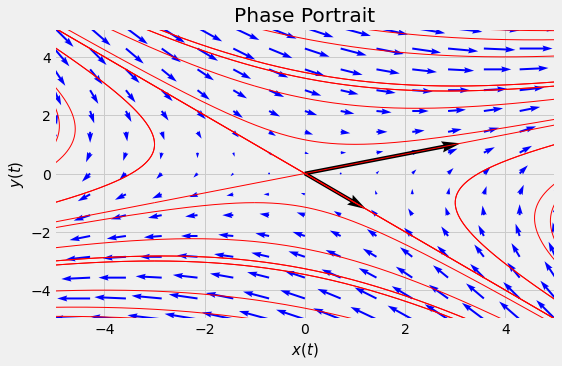

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

origin = np.array([[0, 0],[0, 0]]) # origin point
V = np.array([[1,-1],[3,1]])

def dX_dt(X, t):
    return [X[0] + 3*X[1], X[0]- X[1]]

init_conds = np.linspace(-5,5,6)
ts = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(figsize=(8,5))
for r in init_conds:
    for s in init_conds:
        for i in [-1,1]:
            X0 = [r, s]
            Xs = odeint(dX_dt, X0, i*ts)
            ax.plot(Xs[:,0], Xs[:,1],c='r',lw=1)
plt.xlim(-5,5)
plt.xlabel(r'$x(t)$',fontsize=15)

plt.ylim(-5,5)
plt.ylabel(r'$y(t)$', fontsize=15)

X,Y = np.mgrid[-5:5:15j, -5:5:15j]
u = X + 3*Y
v = X - Y

ax.quiver(X, Y, u, v,color='blue')
plt.quiver(*origin, V[:,0], V[:,1], color=['k','k'],scale=10, angles='xy')

ax.title.set_text('Phase Portrait')
plt.show()

## Changing Coordinates

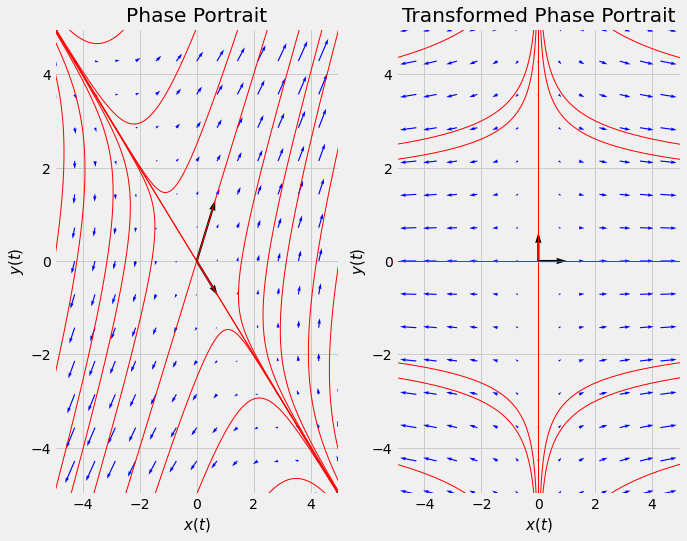

In [4]:
def dX_dt(X, t):
    return [X[0] + 2*X[1], 4*X[0] + 3*X[1]]

def TdX_dt(X, t):
    return [5*X[0], -1*X[1]]

origin = np.array([[0, 0],[0, 0]]) # origin point
V = np.array([[1, 2], [1, -1]])
V1 = np.array([[1, 0], [0, 1]])

init_conds = np.linspace(-5,5,5)
ts = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(1, 2, figsize=(10,8))
for r in init_conds:
    for s in init_conds:
        for i in [-1,1]:
            X0 = [r, s]
            Xs = odeint(dX_dt, X0, i*ts)
            TXs = odeint(TdX_dt, X0, i*ts)
            ax[0].plot(Xs[:,0], Xs[:,1],c='r',lw=1)
            ax[1].plot(TXs[:,0], TXs[:,1], c='r',lw=1)
for a in ax:
    
    a.set_xlim(-5,5)
    a.set_xlabel(r'$x(t)$',fontsize=15)

    a.set_ylim(-5,5)
    a.set_ylabel(r'$y(t)$', fontsize=15)

X,Y = np.mgrid[-5:5:15j, -5:5:15j]
u1 = X + 2*Y
v1 = 4*X + 3*Y
u2 = 5*X
v2 = -1*Y

ax[0].quiver(X, Y, u1, v1,color='blue')
ax[0].quiver(*origin, V[:,0], V[:,1], color=['k','k'],scale=10, angles='xy')
ax[0].title.set_text('Phase Portrait')

ax[1].quiver(X, Y, u2, v2,color='blue')
ax[1].quiver(*origin, V1[:,0], V1[:,1], color=['k','k'],scale=10, angles='xy')

ax[1].title.set_text('Transformed Phase Portrait')
plt.show()

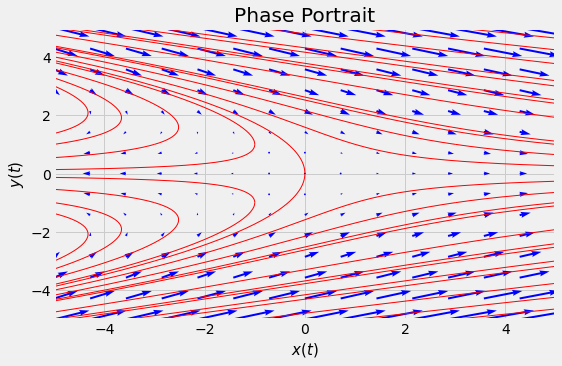

In [5]:
plt.style.use('fivethirtyeight')

origin = np.array([[0, 0],[0, 0]]) # origin point
V = np.array([[1,-1],[3,1]])

def dX_dt(X, t):
    return [X[0] + X[1]**2, - X[1]]

init_conds = np.linspace(-5,5,6)
ts = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(figsize=(8,5))
for r in init_conds:
    for s in init_conds:
        for i in [-1,1]:
            X0 = [r, s]
            Xs = odeint(dX_dt, X0, i*ts)
            ax.plot(Xs[:,0], Xs[:,1],c='r',lw=1)
plt.xlim(-5,5)
plt.xlabel(r'$x(t)$',fontsize=15)

plt.ylim(-5,5)
plt.ylabel(r'$y(t)$', fontsize=15)

X,Y = np.mgrid[-5:5:15j, -5:5:15j]
u = X + Y**2
v = - Y

ax.quiver(X, Y, u, v,color='blue')

ax.title.set_text('Phase Portrait')
plt.show()

In [7]:
from sympy import symbols, pprint

s1 = symbols(r'omega_1')
pprint(s1)

ω₁


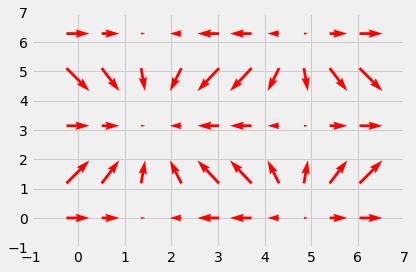

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

X, Y = np.mgrid[:2*np.pi:10j,:2*np.pi:5j]
U = np.cos(X)
V = np.sin(Y)

fig, ax = plt.subplots(1,1)
Q = ax.quiver(X, Y, U, V, pivot='mid', color='r', units='inches')

ax.set_xlim(-1, 7)
ax.set_ylim(-1, 7)

def update_quiver(num, Q, X, Y):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """

    U = np.cos(X + num*0.1)
    V = np.sin(Y + num*0.1)

    Q.set_UVC(U,V)

    return Q,

# you need to set blit=False, or the first set of arrows never gets
# cleared on subsequent frames
anim = animation.FuncAnimation(fig, update_quiver, fargs=(Q, X, Y),
                               interval=50, blit=False)
fig.tight_layout()
plt.show()